In [ ]:
# sample from exponential distribution and try to find the likelihood and 
# posterior plots in the hyp and data spaces. Try plotting 3d plots to find two parameters

In [2]:
# Use bayes rule to compare two model hypotheses.

In [239]:
!pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


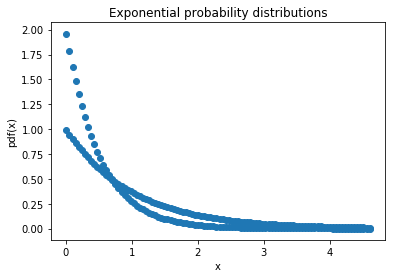

In [240]:
from scipy.stats import expon, norm
from mpl_toolkits import mplot3d

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)

plt.title('Exponential probability distributions')
plt.xlabel('x')
plt.ylabel('pdf(x)')
#scale is 1/lambda
plt.scatter(x=(x,x), y=(expon.pdf(x), expon.pdf(x, scale=0.5)))
plt.show()

In [228]:
class Bayesian:
    
    def __init__(self, pdf):
        self.hyp_pdf = pdf
        self.hyp_params = None
        self.theta = None
        self.likelihood_fn = None
    

    # often this would be log likehood where we sum the log(probs) instead of take the product
    def likelihood(self, X, min_w_lim=0, max_w_lim=10, nb_of_ws=100, nb_dims =1):
        
        # prob(data | params) i.e. prob in hypothesis space
        # assume single param w for now
        if nb_dims ==1:
            beta_range = np.linspace(min_w_lim, max_w_lim, num=nb_of_ws)
            arr = np.zeros(nb_of_ws)
            
            for i in range(1, len(beta_range)):
                beta_ = beta_range[i]
                first_likelihood = self.hyp_pdf(X[0], scale=beta_)
                likelihood = first_likelihood
                # product of probs
                for x in X:
                    likelihood *= self.hyp_pdf(x, scale=beta_)
                arr[i] = likelihood / first_likelihood
            
            hyp_space = beta_range
        
        # normal distribution --> could generalise to n nb_dims and not assume normal later
        if nb_dims == 2:
            sigma_range = np.linspace(1, max_w_lim, num=nb_of_ws)
            mu_range = np.linspace(min_w_lim, max_w_lim, num=nb_of_ws)
            arr = np.zeros(np.square(nb_of_ws)).reshape(nb_of_ws, nb_of_ws)

            for i in range(0, len(sigma_range)):
                sigma_ = sigma_range[i]
                for j in range(0, len(mu_range)):
                    mu_ = mu_range[j]
                    first_likelihood = self.hyp_pdf(X[0], loc=mu_, scale=sigma_)
                    likelihood = first_likelihood
                    # product of probs
                    for x in X:
                        likelihood *= self.hyp_pdf(x, loc=mu_, scale=sigma_)
                    if first_likelihood == 0:
                        arr[i,j] = 0 
                    else:
                        arr[i,j] = likelihood / first_likelihood
            hyp_space = np.concatenate((sigma_range.reshape(len(sigma_range),1), mu_range.reshape(len(mu_range),1)), axis=1)
        likelihood_fn = arr
        self.likelihood_fn = likelihood_fn, hyp_space
        return self.likelihood_fn
    
    def max_likelihood(self):
        max_likelihood_val_idx = np.argmax(self.likelihood_fn[0])
        return self.likelihood_fn[1][max_likelihood_val_idx]
    

In [160]:
# draw points from an exponential distribution to get dataset
# plot likelihood fn of lambda in hypothesis space

beta = 4
num_samples =100
X_exp = np.random.exponential(scale=beta, size=(num_samples,))

print(X[:10])

[ 8.39459309  2.85595349  0.59643742  0.68816705  4.00870162 13.17937066
 17.64522687  8.7204609   4.77017     6.31918875]


In [161]:
exp_pdf = expon.pdf
bayes_exp = Bayesian(exp_pdf)

In [162]:
likelihood_in_hyp_space = bayes_exp.likelihood(X=X_exp)
# likelihood_in_hyp_space[0][:10]
likelihood_in_hyp_space[0][90:]

array([1.13044590e-117, 6.38375170e-118, 3.60669738e-118, 2.03891924e-118,
       1.15343403e-118, 6.53026278e-119, 3.70044193e-119, 2.09893387e-119,
       1.19179294e-119, 6.77473109e-120])

/Users/OFlynn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


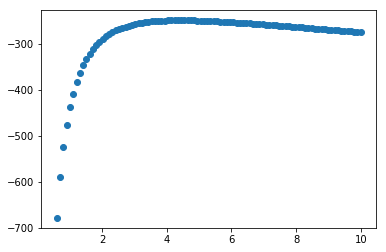

In [163]:
plt.scatter(y=np.log(likelihood_in_hyp_space[0]), x=likelihood_in_hyp_space[1])

In [164]:
print('The maximum likelihood of beta is: \n', round(bayes_exp.max_likelihood(), 5))

The maximum likelihood of beta is: 
 4.44444


In [275]:
# draw points from a normal distribution to get dataset
# Plot 3-d likelihood function for mu and sigma assuming normal distribution

mu, sigma = 40, 20
num_samples_norm =100
X_norm = np.random.normal(loc=mu, scale=sigma, size=(num_samples_norm,))

X_norm[:10]

array([41.9924382 , 37.05872152, 50.07704078, 30.78301372, 47.50876434,
       58.35370396, 31.64954691, 52.55714235, 15.09199675, 44.85671299])

In [276]:
norm_pdf = norm.pdf
bayes_norm = Bayesian(norm_pdf)

In [277]:
norm_likelihood_in_hyp_space = bayes_norm.likelihood(X=X_norm,  min_w_lim=-10, max_w_lim=100, nb_of_ws=10, nb_dims=2)
print(norm_likelihood_in_hyp_space[0].shape)
print(norm_likelihood_in_hyp_space[1].shape)

(10, 10)
(10, 2)


In [291]:
idx1, idx2 = 1, 5
print('Likelihood of sigma of {} and mu of {} is: \n'.format(norm_likelihood_in_hyp_space[1][idx1,0], norm_likelihood_in_hyp_space[1][idx2,1]), norm_likelihood_in_hyp_space[0][idx1, idx2])

Likelihood of sigma of 12.0 and mu of 51.11111111111111 is: 
 1.2971909987895128e-225


(10,) (10,) (10, 10)
1.0 -10.0
[[  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]]


/Users/OFlynn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show(*args, **kw)>

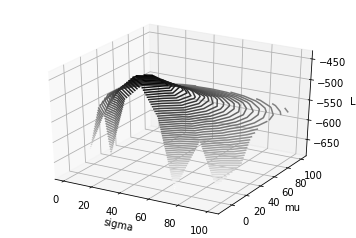

In [297]:
x1 = norm_likelihood_in_hyp_space[1][:,0]
y1 = norm_likelihood_in_hyp_space[1][:,1]
z1 = norm_likelihood_in_hyp_space[0]

print(x1.shape, y1.shape, z1.shape)
print(min(x1), min(y1))
X, Y = np.meshgrid(x1, y1)
Z = np.log(z1)

print(X)
# plt.figure(figsize=(6,5))
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_zlabel('L');
# plt.xlim([0, 5])
# plt.ylim([-15,15])
plt.show

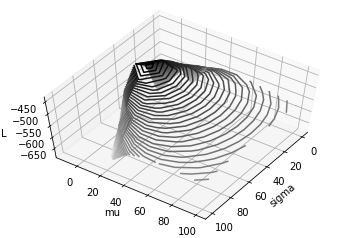

In [283]:
ax.view_init(60, 35)
fig

In [298]:
np.where(Z==Z.max())

(array([2]), array([4]))

In [304]:
print('Max log likelihood is: \n', Z[2][4], '\n with mu equal to {} and sigma equal to {}'.format(X[2][4], Y[2][4]))
# BUG SOMEWHERE SWITCHING MU AND SIGMA
print('Golden truth mu is {} and sigma is {}'.format(mu, sigma))

Max log likelihood is: 
 -435.8834964255112 
 with mu equal to 45.0 and sigma equal to 14.444444444444443
Golden truth mu is 40 and sigma is 20


In [489]:
# Monte Carlo Markov Chain Methods
# Define dataset with ground truth two normal distributions with different means and sigmas
# Run MC simulation using Metropolis method to generate estimate for posterior distribution

mu1, sigma1 = 400, 20
mu2, sigma2 = 20, 10
num_samples_norm =50
X_cluster_1 = np.random.normal(loc=mu1, scale=sigma1, size=(num_samples_norm,))
X_cluster_2 = np.random.normal(loc=mu2, scale=sigma2, size=(num_samples_norm,))
X_clusters = np.concatenate((X_cluster_1, X_cluster_2), axis=0)
np.random.shuffle(X_clusters)

X_clusters[:10]

array([407.38334953, 384.32398441,  28.47406292,  42.5715524 ,
       418.53469235,  16.31164457, 412.39439506,  38.13719261,
       408.05705694,   8.10522185])

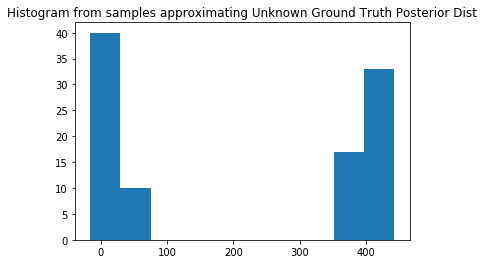

In [514]:
plt.title('Histogram from samples approximating Unknown Ground Truth Posterior Dist')
plt.hist(X_clusters)
plt.show()

In [787]:
print(np.mean(X_cluster_1))
print(np.mean(X_cluster_2))

403.5719403706494
19.051406955288122


In [843]:
# Metropolis Method
# Step 1 - choose Q and sample x from Q
# Step 2 - for each sample x_new, from Q(x_new | x_old), calculate P_star = numerator of Bayes rule, 
# if P_star(x_new) > P_star(x_old) then always accept. Else accept with prob a where A is P_star(new)/P_star(old)
# Step 3 - run num_steps until estimator of distribution approximates posterior
# Step 4 - use posterior to calculate expectations of various functions e.g. 1(x from dist_a vs. dist_b)

import math

class MetropolisMC:
    def __init__(self, Q, theta_prior_draw, theta_prior_pdf):
        self.Q = Q
        self.prior_draw = theta_prior_draw
        self.prior_pdf = theta_prior_pdf
        # theta is 2,k matrix of params of Q - for normal mu is idx 0 and sigma is idx 1 -> 2 rows as assume 2 normals
        self.theta = self.prior_draw
        self.num_clusters = 2
        self.accepted_draws = []
        self.rejected_draws = []
        self.likelihood_fn = None
        print('Initialised values of mu to {} and sigma to {}'.format(self.theta[0], self.theta[1]))
    
    # for simplicity we assume that points are generated from each normal with prob 50% (which is actually true as per true dist). 
    # This could be generalised by adding two more variables pi_1, pi_2
    def loglikelihood_norm(self, X_obs, theta):
        n = round(len(X_obs)/self.num_clusters)
        ll=0
        X_obs_split = [X_obs[:n], X_obs[n:]]
        for i in range(self.num_clusters):
            # naive split X_obs evenly by num_clusters
            ll -= (1/self.num_clusters)*(n*math.log(2*math.pi*(theta[1][i]**2))/2 + np.sum(((X_obs_split[i]-theta[0][i])**2)/(2 * (theta[1][i]**2))))
        return ll
    
    # For now we ignore the prior distribution and calculate P_star = LL as will cancel when we P_star/P_star
    
    # something strange where LL new is always bigger 
    def P_star_update(self, theta_star_old, Q_sigma, X_obs):
        # random walk with Q from the last accepted theta
        Q_draw_mu1 = self.Q(loc=theta_star_old[0][0], scale=Q_sigma)
        Q_draw_mu2 = self.Q(loc=theta_star_old[0][1], scale=Q_sigma)
        theta_star = [[Q_draw_mu1, Q_draw_mu2],[20, 10]]
        
        P_star_new = self.loglikelihood_norm(X_obs, theta_star)
        P_star_old = self.loglikelihood_norm(X_obs, theta_star_old)
#         print(theta_star, 'AND', theta_star_old, '---', P_star_new,'AND' ,P_star_old)
        
        if P_star_new > P_star_old:
            self.accepted_draws.append(theta_star)
            self.rejected_draws.append(theta_star_old)
#             print('Case 1')
        else:
            # Be careful here if we add in priors with the exponential as only applies to the LL due to logarithm
            a_ratio = np.exp(P_star_new - P_star_old)
#             print('a ratio', a_ratio)
            if a_ratio > np.random.rand(): 
                self.accepted_draws.append(theta_star)
                self.rejected_draws.append(theta_star_old)

#                 print('Case 2')
            else:
                self.rejected_draws.append(theta_star)
                self.accepted_draws.append(theta_star_old)
                theta_star = theta_star_old
#                 print('Case 3')
        print('Accepted:',self.accepted_draws, '\n rejected:',self.rejected_draws, '\n theta:',theta_star)
        return self.accepted_draws, self.rejected_draws, theta_star
    
    # this cannot be done in general for complex posterior distribtuions
    def plot_likelikhood_hyp_space(self, X_obs, min_w_lim=0, max_w_lim=10, nb_of_ws=100):
        
        mu_range = np.linspace(min_w_lim, max_w_lim, num=nb_of_ws)
        sigma_range = np.linspace(1, max_w_lim, num=nb_of_ws)

        arr = np.zeros(np.square(nb_of_ws)).reshape(nb_of_ws, nb_of_ws)

        for i in range(0, len(sigma_range)):
            sigma_ = sigma_range[i]
            for j in range(0, len(mu_range)):
                mu_ = mu_range[j]
                likelihood = self.loglikelihood_norm(X_obs, [[mu_,mu_],[sigma_,sigma_]])
                arr[i,j] = likelihood
        hyp_space = np.concatenate((sigma_range.reshape(len(sigma_range),1), mu_range.reshape(len(mu_range),1)), axis=1)
        likelihood_fn = arr
        self.likelihood_fn = likelihood_fn, hyp_space
        return self.likelihood_fn

In [844]:
Q_mu, Q_sigma = 30, 10
Q = np.random.normal
# choose wide uniform dist for priors of mu and sigma for the hypotheses of two normals
# theta_prior_draw = [[np.random.uniform(0,100),np.random.uniform(0,100)],[20, 10]] 
theta_prior_draw = [[390,10],[20, 10]] 
theta_prior_pdf = [[1/100, 1/100],[1/50, 1/50]]
metMC = MetropolisMC(Q, theta_prior_draw, theta_prior_pdf)

Initialised values of mu to [390, 10] and sigma to [20, 10]


In [845]:
metMC.loglikelihood_norm(X_clusters, [[300,20],[20, 10]])

-10992.638849671961

In [828]:
accepted, rejected, theta_star = metMC.P_star_update(metMC.theta, Q_sigma, X_clusters)
MC_n = 500
for i in range(MC_n):
    accepted, rejected, theta_star = metMC.P_star_update(theta_star, Q_sigma, X_clusters)
# print('List of accepted samples: \n',Accepted)
print('# accepted samples: \n', len(accepted), 'out of', MC_n+1)
print('# rejected samples: \n', len(rejected), 'out of', MC_n+1)

Accepted: [[[375.8227012519856, 16.5443295169201], [20, 10]]] 
 rejected: [[[390, 10], [20, 10]]] 
 theta: [[375.8227012519856, 16.5443295169201], [20, 10]]
Accepted: [[[375.8227012519856, 16.5443295169201], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]]] 
 rejected: [[[390, 10], [20, 10]], [[375.8227012519856, 16.5443295169201], [20, 10]]] 
 theta: [[380.121919574654, 21.015993090356858], [20, 10]]
Accepted: [[[375.8227012519856, 16.5443295169201], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]]] 
 rejected: [[[390, 10], [20, 10]], [[375.8227012519856, 16.5443295169201], [20, 10]], [[397.21968277542163, 20.512879181299596], [20, 10]]] 
 theta: [[380.121919574654, 21.015993090356858], [20, 10]]
Accepted: [[[375.8227012519856, 16.5443295169201], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]], [[369.7024327469625, 19.362891197271136], [20, 10

Accepted: [[[375.8227012519856, 16.5443295169201], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]], [[380.121919574654, 21.015993090356858], [20, 10]], [[369.7024327469625, 19.362891197271136], [20, 10]], [[369.7024327469625, 19.362891197271136], [20, 10]], [[353.781295097606, 39.314583814382296], [20, 10]], [[353.781295097606, 39.314583814382296], [20, 10]], [[353.781295097606, 39.314583814382296], [20, 10]], [[353.781295097606, 39.314583814382296], [20, 10]], [[353.781295097606, 39.314583814382296], [20, 10]], [[371.88088213023593, 59.21922775110802], [20, 10]], [[383.8167017796403, 62.7091390112457], [20, 10]], [[396.7694057168523, 75.52913514968101], [20, 10]], [[396.7694057168523, 75.52913514968101], [20, 10]], [[386.307905901314, 90.16308447908884], [20, 10]], [[386.307905901314, 90.16308447908884], [20, 10]], [[387.73761207827135, 98.50895966294962], [20, 10]], [[389.1697191021401, 101.42190986760541], [20, 10]], [[400.225122148414, 119.9747657843838], [20, 10]], [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [829]:
acc_arr = np.array(accepted)
sig20 = acc_arr[:,0,0]
sig10= acc_arr[:,0,1]
print(np.mean(sig20))
print(np.mean(sig10))

227.0893732327851
205.39674214581459


(array([ 10.,   6.,  12.,  15., 429., 462.,  12.,   8.,  16.,  32.]),
 array([ 16.54432952,  55.62869506,  94.71306061, 133.79742616,
        172.88179171, 211.96615726, 251.0505228 , 290.13488835,
        329.2192539 , 368.30361945, 407.387985  ]),
 <a list of 10 Patch objects>)

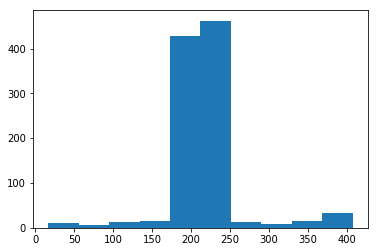

In [830]:
combined_arr = np.append(sig20,sig10)
plt.hist(combined_arr)

In [831]:
rej_arr = np.array(rejected)
print(len(rej_arr), len(acc_arr))

501 501


In [836]:
# scatter plot with accepted and rejected categories, y axis is mu and x axis is n iterations
import pandas as pd

ll_calc = lambda mu1, mu2: metMC.loglikelihood_norm(X_clusters, [[mu1,mu2],[20, 10]])

data = {'accepted_20': acc_arr[:,0,0], 'accepted_10': acc_arr[:,0,1], 'rejected_20': rej_arr[:,0,0], \
        'rejected_10':rej_arr[:,0,1], 'iterations':np.array([i for i in range(len(acc_arr))]), \
       'll_accepted': np.array([ll_calc(acc_arr[:,0,0][i],acc_arr[:,0,1][i]) for i in range(len(acc_arr))])}
df = pd.DataFrame(data=data)

print(df.head())

   accepted_20  accepted_10  rejected_20  rejected_10  iterations  \
0   375.822701    16.544330   390.000000    10.000000           0   
1   380.121920    21.015993   375.822701    16.544330           1   
2   380.121920    21.015993   397.219683    20.512879           2   
3   369.702433    19.362891   380.121920    21.015993           3   
4   369.702433    19.362891   360.631645    14.839268           4   

    ll_accepted  
0 -11782.546024  
1 -11608.578807  
2 -11608.578807  
3 -11580.040463  
4 -11580.040463  


(501, 4)
(501,)


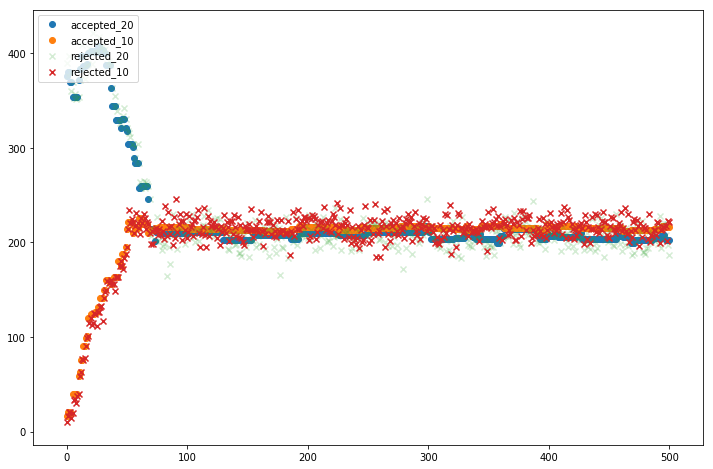

In [839]:
print(df[['accepted_20', 'accepted_10', 'rejected_20', 'rejected_10']].shape)
print(df['iterations'].shape)

plt.figure(figsize=(12,8))

plt.scatter(y=df['accepted_20'], x=df['iterations'])
plt.scatter(y=df['accepted_10'], x=df['iterations'])
plt.scatter(y=df['rejected_20'], x=df['iterations'], marker='x', alpha=0.2)
plt.scatter(y=df['rejected_10'], x=df['iterations'], marker='x')

plt.legend(loc='upper left')
plt.show()

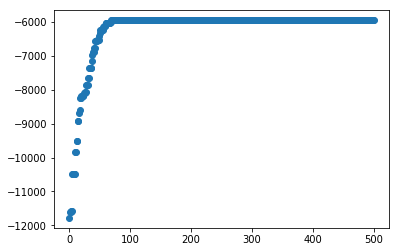

In [841]:
plt.scatter(y=df['ll_accepted'], x=df['iterations'])
plt.show()

(array([40., 10.,  0.,  0.,  0.,  0.,  0.,  0., 17., 33.]),
 array([-16.07475099,  29.84331173,  75.76137445, 121.67943717,
        167.59749989, 213.51556261, 259.43362533, 305.35168805,
        351.26975077, 397.18781349, 443.10587621]),
 <a list of 10 Patch objects>)

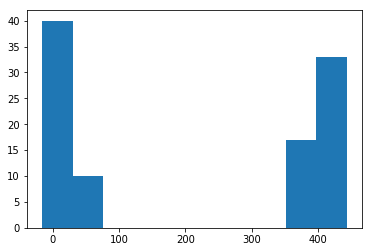

In [597]:
# plot likelihood surface across mu and sigma
# take dot product of prior distribution (dim1 w k variables) and likelihood (dim1) to get p_star (dim1 = dim(X))
plt.hist(X_clusters)

In [847]:
norm_likelihood_in_hyp_space = metMC.plot_likelikhood_hyp_space(X_obs=X_clusters,  min_w_lim=-10, max_w_lim=1000, nb_of_ws=10)
print(norm_likelihood_in_hyp_space[0].shape)
print(norm_likelihood_in_hyp_space[1].shape)

(10, 10)
(10, 2)


(10,) (10,) (10, 10)
1.0 -10.0
[[-2.15748594e+06 -1.23052723e+06 -9.33259874e+05 -1.26568388e+06
  -2.22779924e+06 -3.81960596e+06 -6.04110404e+06 -8.89229347e+06
  -1.23731743e+07 -1.64837464e+07]
 [-4.53861666e+02 -3.79965085e+02 -3.56267113e+02 -3.82767751e+02
  -4.59466999e+02 -5.86364856e+02 -7.63461323e+02 -9.90756399e+02
  -1.26825008e+03 -1.59594238e+03]
 [-3.59689456e+02 -3.41049252e+02 -3.35071505e+02 -3.41756217e+02
  -3.61103386e+02 -3.93113012e+02 -4.37785096e+02 -4.95119638e+02
  -5.65116638e+02 -6.47776095e+02]
 [-3.55843501e+02 -3.47534143e+02 -3.44869406e+02 -3.47849291e+02
  -3.56473797e+02 -3.70742924e+02 -3.90656672e+02 -4.16215041e+02
  -4.47418031e+02 -4.84265643e+02]
 [-3.61745427e+02 -3.57064408e+02 -3.55563247e+02 -3.57241945e+02
  -3.62100500e+02 -3.70138913e+02 -3.81357183e+02 -3.95755312e+02
  -4.13333299e+02 -4.34091143e+02]
 [-3.68964276e+02 -3.65965730e+02 -3.65004123e+02 -3.66079455e+02
  -3.69191727e+02 -3.74340939e+02 -3.81527090e+02 -3.90750181e+02
  

<function matplotlib.pyplot.show(*args, **kw)>

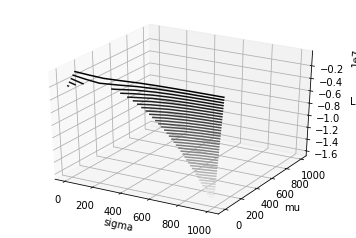

In [856]:
x1 = norm_likelihood_in_hyp_space[1][:,0]
y1 = norm_likelihood_in_hyp_space[1][:,1]
z1 = norm_likelihood_in_hyp_space[0]

print(x1.shape, y1.shape, z1.shape)
print(min(x1), min(y1))
X, Y = np.meshgrid(x1, y1)
Z = z1

print(Z)
# plt.figure(figsize=(6,5))
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_zlabel('L');
# plt.xlim([0, 5])
# plt.ylim([-15,15])
plt.show

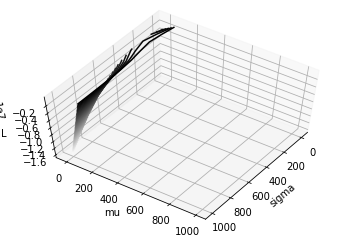

In [854]:
ax.view_init(60, 35)
fig

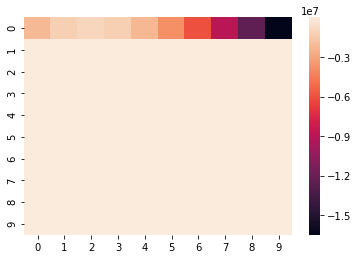

In [857]:
sns.heatmap(data=Z)